# 1D Linear Regression Using Gradient Descent

Here we will introduce 1D Linear Regression and compute the weights using Gradient Descent.

This notebook will give you an algorithm that will work for n number of input features but first we'll test it on 1D data.

## Process

* Loading the data
* Exploring the data
* Adding bias to our input 
* Solve for weights using Gradient Descent
* Fit a line using weights
* Make a Prediction

## Equations

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

the objective is to minimize the cost function $J(\theta)$

where $\theta$ is computed using gradient descent

and the hypothesis $h_\theta(x)$ is given by the linear model

$$ h_\theta(x) = \theta^T x = x_0\theta_0 + \theta_1 x_1$$

the weights of the model are the $\theta_{j}$ values and are adjusted to minimize $J(\theta)$

one way to do this is to use batch gradient descent where each iteration performs an update

$$ \theta_{j} := \theta_{j} - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)x_j^{(i)} $$

In [4]:
import os

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

## Loading the data

In [20]:
data = np.loadtxt('data/population_vs_profit.txt', delimiter=',')
m = len(data)
n = len(data[0]) - 1
print("Shape of data", data.shape)
print("Number of samples", m)
print("Number of features", n)
X, y = data[:, n-1], data[:, n]

Shape of data (97, 2)
Number of samples 97
Number of features 1


## Exploring the data

### Plotting the data

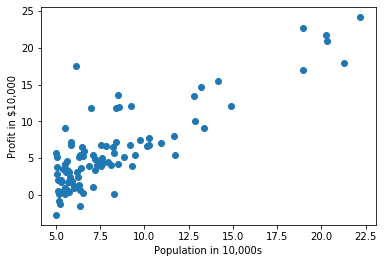

In [21]:
plt.scatter(X, y)
plt.ylabel('Profit in $10,000')
plt.xlabel('Population in 10,000s');

### Visualizing the shape of our data

$X$ is a feature matrix that is $m$ $x$ $(n + 1)$ where:

* $m =$ number of training examples
* $n =$ number of features

$\vec{y}$ is our ouput vector that is $m$ $x$ $1$

In [22]:
print("The shape of X is", X.shape)
print("The shape of y is", y.shape)

The shape of X is (97,)
The shape of y is (97,)


## Adding bias to our input

This is the process of adding the feature $x_0$ to

$$ h_\theta(x) = \theta_0 + \theta_1 x_1 $$

To do this we add a column of 1's to our feature matrix and call it $x_0$

In [23]:
# here we add a column of 1's for our bias we'll use stack for numpy arrays with shape (m,)
# the numpy function stack joins arrays along a given axis 
# the first axis (axis=0) refers to rows (training examples) and the second axis (axis=1) refers to columns (features).
X = np.stack([np.ones(m), X], axis=1)

print("Shape of X is", X.shape)
print("Example feature vector", X[0])

Shape of X is (97, 2)
Example feature vector [1.     6.1101]


## Computing the cost function $J(\theta)$

In [24]:
theta
h = X@theta
J = 1/(2*m)*sum((h - y)**2)

NameError: name 'theta' is not defined